# Data Insights Summary Notebook

This notebook contains all pertinent visualizations presented in the full analysis found at the: **Combined Data Visualization and Insights Notebook**

In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import re
import plotly.express as px

%matplotlib inline

# for translation
import sys
sys.path.append('../')
from Translate_data import translate_data

# to plot
import altair as alt
alt.renderers.enable('mimetype')
alt.renderers.enable('notebook')
alt.renderers.enable('default')


# root to call the data 
root = "../../../data/"

In [2]:
# Set Display Options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Load Data
df = pd.read_csv(root + 'saber_combined_all_fields.csv')
df = df.drop(columns = 'Unnamed: 0')

# Translate data
df_eng = translate_data(df, 'spanish', 'english')
saber = df_eng.copy() 

In [3]:
# Wrangling Department

# - - - correct code - - - 
# Change code from float to int
df_eng['your_dept_code_resides'] = df_eng[['your_dept_code_resides']].apply(np.int64).astype(str)
df_eng['your_dept_code_resides.1'] = df_eng[['your_dept_code_resides.1']].apply(np.int64).astype(str)

# two-digit code for Department (Colombian States)
df_eng['your_dept_code_resides'] = ["0"+i if len(i)==1 else i for i in df_eng['your_dept_code_resides']]
df_eng['your_dept_code_resides.1'] = ["0"+i if len(i)==1 else i for i in df_eng['your_dept_code_resides.1']]

# Wrangling Municipality

# - - - correct name - - - 
import re
municipality_list = list(df_eng['cole_municipality_location'].unique()) + \
                    list(df_eng['your_municipality_resides'].unique()) + \
                    list(df_eng['your_inst_municipality'].unique()) + \
                    list(df_eng['your_municipality_resides.1'].unique())

municipality_list = pd.DataFrame(data=municipality_list, columns=['Name'])#.unique()
municipality_list = list(municipality_list.Name.unique())
municipality_list = [str(i) for i in municipality_list]
municipality_list = sorted(municipality_list)
municipality_values = sorted(municipality_list)

municipality_values = [re.sub(r'BOGOTÁ, D.C.', 'BOGOTÁ D.C.', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CARTAGENA$', 'CARTAGENA DE INDIAS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CHIQUINQUIRA$', 'CHIQUINQUIRÁ', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CIÉNEGA$', 'CIÉNAGA', mun) for mun in municipality_values]
municipality_values = [re.sub(r'PUERTO ASIS$', 'PUERTO ASÍS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'POPAYAN$', 'POPAYÁN', mun) for mun in municipality_values]
municipality_values = [re.sub(r'FACATATIVÁ$', 'FACATATIVA', mun) for mun in municipality_values]

zip_iterator = zip(municipality_list, municipality_values) # Get pairs of elements
municipality_dict = dict(zip_iterator)  # Convert to dictionary

municipality_columns = ['cole_municipality_location', 'your_municipality_resides',
                        'your_inst_municipality', 'your_municipality_resides.1']

for col in municipality_columns:
    df_eng[col] = df_eng[col].map(municipality_dict)
    
# - - - correct code - - - 
# Change code from float to int
df_eng['your_municipality_code_resides'] = df_eng[['your_municipality_code_resides']].apply(np.int64).astype(str)
df_eng['your_municipality_code_resides.1'] = df_eng[['your_municipality_code_resides.1']].apply(np.int64).astype(str)

# two-digit code for Department (Colombian States)
df_eng['your_municipality_code_resides'] = ["0"+i if len(i)==4 else i for i in df_eng['your_municipality_code_resides']]
df_eng['your_municipality_code_resides.1'] = ["0"+i if len(i)==4 else i for i in df_eng['your_municipality_code_resides.1']]

In [4]:
# Remove duplicated columns
saber = saber.loc[:, ~saber.columns.duplicated()]
saber.shape

(212010, 142)

# Student Distributions

The following section covers illustrating the distribution of student population based on different features. 

## Gender


In [5]:
source = df_eng.groupby('your_gender').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),
    alt.Y('your_gender', title="Gender"),
    alt.Color('your_gender')
).properties(
    title = "Number of students per Gender"
)

alt.Chart(...)

## Foreigners

In [6]:
source = df_eng.groupby('your_foreigner').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_foreigner', title="Foreigner"),
    alt.Color('your_foreigner')
).properties(
    title = "Number of students per Local or Foreigners"
)

alt.Chart(...)

## Marital Status

In [7]:
source = df_eng.groupby('your_marital_status').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_marital_status', sort="-x", title="Marital Status"),
    alt.Color('your_marital_status', legend=None),
    tooltip=['your_marital_status', 'obs']
).properties(
    title = "Number of students per Marital Status"
)

alt.Chart(...)

## Country residence

In [8]:
source = df_eng.groupby('your_country_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('your_country_resides', sort="-y", title="Country of Residence"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_country_resides', legend=None, sort="-y")
).properties(
    title = "Number of students per Country of Residence"
)

alt.Chart(...)

## Ethnicity

In [9]:
source = df_eng.groupby('your_have_ethnicity').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_have_ethnicity', title="Ethnicity"),
    alt.Color('your_have_ethnicity', legend=None),
    tooltip=['your_have_ethnicity', 'obs']
).properties(
    title = "Number of students with or without Ethnicity"
)

alt.Chart(...)

## Department of residence (Colombia states)

In [10]:
# Plot number of students in Colombia by Department (State)

### DATA ###
# States Polygons
states = alt.topo_feature(root + 'Colombia_departamentos_municipios_poblacion-topo.json', 'MGN_AMN_DPTOS')

# Dataframe of the project 'group by' for plotting
source = df_eng.groupby(['your_dept_resides', 'your_dept_code_resides']).\
        count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs',
                                                                    'your_dept_resides': 'name',
                                                                    'your_dept_code_resides': 'code'})

### PLOT ###
# background
base_depart  = alt.Chart(states).mark_geoshape(
    fill='white',
    stroke='red'
).properties(
    width=500,
    height=300
)

# find Department by code
plot_depart_by_code = alt.Chart(states).mark_geoshape(stroke='salmon').encode(
    alt.Color('obs:Q', scale=alt.Scale(type='log'), title="Students")
).transform_lookup(
    lookup='properties.DPTO_CCDGO',
    from_=alt.LookupData(data=source, key='code', fields=['obs'])
).properties(
    width=500,
    height=300
)

# Integrate the plots
plot_depart = (base_depart + plot_depart_by_code)\
                    .properties(title="Number of students in Colombia by Department (State)")
plot_depart

alt.LayerChart(...)

## High School Degree

In [11]:
source = df_eng.groupby('your_high_school_degree').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_high_school_degree', sort='-x', title="High School Degree"),
    alt.Color('your_high_school_degree', legend=None),
    tooltip=['your_high_school_degree', 'obs']
).properties(
    title = "Number of students per High School Degree"
)

alt.Chart(...)

## Tuition Payments

In [12]:
source = df_eng.groupby('your_tuition').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = ['Less than 87,000', 'Between 87,000 and less than 120,000', 'Between 120,000 and less than 150,000',
                'Between 150,000 and less than 250,000', '250,000 or more', 'Does not pay Pension']

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),#, scale=alt.Scale(type='log')),
    alt.Y('your_tuition', sort=source_order, title="Tuition"),
    alt.Color('your_tuition', legend=None),
    tooltip=['your_tuition', 'obs']
).properties(
    title = "Number of students per Tuition"
)

alt.Chart(...)

## Municipality

In [13]:
source = df_eng.groupby('your_municipality_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

print("\nNumber of Municipalities in Colombia:", len(source), "\n")

alt.Chart(source).mark_bar(opacity=0.9).encode(
    alt.X('your_municipality_resides', sort='-y', title="Municipality"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_municipality_resides', legend=None, sort='-y',
             scale=alt.Scale(scheme='yellowgreenblue', reverse=True)
             ),
    tooltip=['your_municipality_resides', 'obs']
).properties(
    width=8500,
    title = "Number of students per Municipality"
)


Number of Municipalities in Colombia: 961 



alt.Chart(...)

In [14]:
# Separating the scores into respective lists

marks = [
 'score_language_saber_11',
 'score_mathematics_saber_11',
 'score_biology_saber_11',
 'score_chemistry_saber_11',
 'score_physics_saber_11',
 'score_social_science_saber_11',
 'score_philosophy_saber_11',
 'score_english_saber_11',
 'score_optative_saber_11', 
 'score_math_saber_pro',
 'score_language_saber_pro',
 'score_social_science_saber_pro',
 'score_english_saber_pro',
 'score_writing_saber_pro'
 ]

saber_marks = [ 
 'score_language_saber_11',
 'score_mathematics_saber_11',
 'score_biology_saber_11',
 'score_chemistry_saber_11',
 'score_physics_saber_11',
 'score_social_science_saber_11',
 'score_philosophy_saber_11',
 'score_english_saber_11',
 'score_optative_saber_11',
 ]

saber_pro_marks = [
 'score_math_saber_pro',
 'score_language_saber_pro',
 'score_social_science_saber_pro',
 'score_english_saber_pro',
 'score_writing_saber_pro'
 ]

# Adding column of total saber and saber pro scores

saber['total_saber_score'] = saber[saber_marks].sum(axis=1)
saber['total_saber_pro_score'] = saber[saber_pro_marks].sum(axis=1)

total_marks = ['total_saber_score', 'total_saber_pro_score']

# Scores by Subject for Department Analysis

This section illustration the student distribution across Colombian Departments by subject for Saber and Saber Pro.  

In [15]:
# Average of Saber-11 scores per Department by Subject

source = pd.DataFrame(columns=['your_dept_resides', 'your_dept_code_resides', 'average', 'subject'])
saber_11_scores = ['score_language_saber_11', 'score_mathematics_saber_11', 'score_biology_saber_11', 
                   'score_chemistry_saber_11', 'score_physics_saber_11', 'score_social_science_saber_11', 
                   'score_philosophy_saber_11', 'score_english_saber_11', 'score_optative_saber_11']
saber_11_subjects = ['biology', 'chemistry', 'english', 'language', 'mathematics', 'optative', 'philosophy', 'physics', 'social_science']

for i in saber_11_scores:
    aux = df_eng.groupby(['your_dept_resides', 'your_dept_code_resides']).mean()[[i]].reset_index().rename(columns={i:'average'})
    aux.sort_values(by=['average'], ascending=False, inplace=True)
    aux = pd.concat([aux.head(20), aux.tail(20)])
    aux['subject'] = re.sub(r'_saber_11', '', re.sub(r'score_', '', i)) # Cleans the subject text
    source = pd.concat([source, aux])

source = pd.pivot_table(source, values='average',
                        index=['your_dept_resides', 'your_dept_code_resides'],
                        columns=['subject']).reset_index().rename(columns={'your_dept_resides': 'name',
                                'your_dept_code_resides': 'code'})

### PLOT ###
# find Department by code
plot_saber11_by_code = base_depart.mark_geoshape(stroke='salmon').encode(
#     alt.Color('average:Q', title="Score"), #scale=alt.Scale(type='log'),
    alt.Color(alt.repeat('row'), type='quantitative'),
).transform_lookup(
    lookup='properties.DPTO_CCDGO',
    from_=alt.LookupData(data=source, key='code', fields=saber_11_subjects)
).properties(
    width=500,
    height=300
).repeat(
    row=saber_11_subjects
).resolve_scale(
    color='independent'
)

plot_saber11_by_code.properties(title="Average of Saber-11 scores per Department by Subject")

alt.RepeatChart(...)

In [16]:
# Highlight min and max values
df_eng.groupby('your_dept_resides').mean()[saber_marks].style.background_gradient(cmap='Blues')\
                                                             .highlight_max(color = 'orange', axis=0)\
                                                             .highlight_min(color = 'lightgreen', axis=0)
                                                        

,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_optative_saber_11
your_dept_resides,,,,,,,,,
AMAZONAS,47.687500,44.281250,45.187500,45.593750,44.906250,44.968750,42.531250,41.281250,38.781250
ANTIOQUIA,51.970659,52.128493,49.445644,49.514712,48.272604,50.037583,45.031237,52.709800,32.709346
ARAUCA,47.164062,45.562500,45.863281,45.941406,44.328125,45.515625,40.820312,44.234375,35.570312
ATLANTICO,50.889175,51.114182,48.909454,49.694730,49.149029,48.751214,44.580905,52.257855,31.991859
BOGOTA,53.219333,54.505108,51.126950,52.156149,50.572982,51.582033,46.914354,56.926112,28.287097
BOLIVAR,50.188814,49.543773,48.319612,49.208501,47.931544,48.358986,44.094705,48.479642,34.034154
BOYACA,50.771358,52.238558,49.608886,50.281083,48.597063,49.943745,44.757056,48.817124,27.983410
CALDAS,51.037684,51.158548,49.297335,50.097656,48.431526,49.367647,44.875689,50.080653,30.986903
CAQUETA,48.094925,46.906015,46.679511,47.180451,45.802632,47.192669,41.955827,44.767857,32.175752


The geospatial map and the groupby table show that <code>**EXTRAJERO DEPARTMENT**</code> holds the highest mean scores for almost all subjects while <code>**CHOCO DEPARTMENT**</code> holds the lowest mean scores for almost all subjects. 

# Scores by Municipality Analysis

This visualization aims to present student distribution across Municipalities.

In [17]:
saber_municipality = saber.copy()
saber_municipality_score = saber_municipality.groupby("your_municipality_resides").agg(['mean', 'count'])[total_marks]
threshold = saber_municipality['your_municipality_resides'].value_counts().describe()['50%']
print("The 50th percentile are municipalities that have {} instances in the dataset".format(threshold))

# Filter municipalities with > 50% percentile instances
saber_municipality_score = saber_municipality_score[saber_municipality_score['total_saber_score']['count'] > threshold]
print("Total municipalities left: {}".format(saber_municipality_score.shape[0]))

# Top and Bottom municipalities
top_50_saber = saber_municipality_score['total_saber_score']['mean'].sort_values(ascending=False).head(50)
bot_50_saber = saber_municipality_score['total_saber_score']['mean'].sort_values(ascending=False).tail(50)

The 50th percentile are municipalities that have 15.0 instances in the dataset
Total municipalities left: 471


In [18]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Top 50 and Bottom 50 Municipalities by Saber 11 Scores')

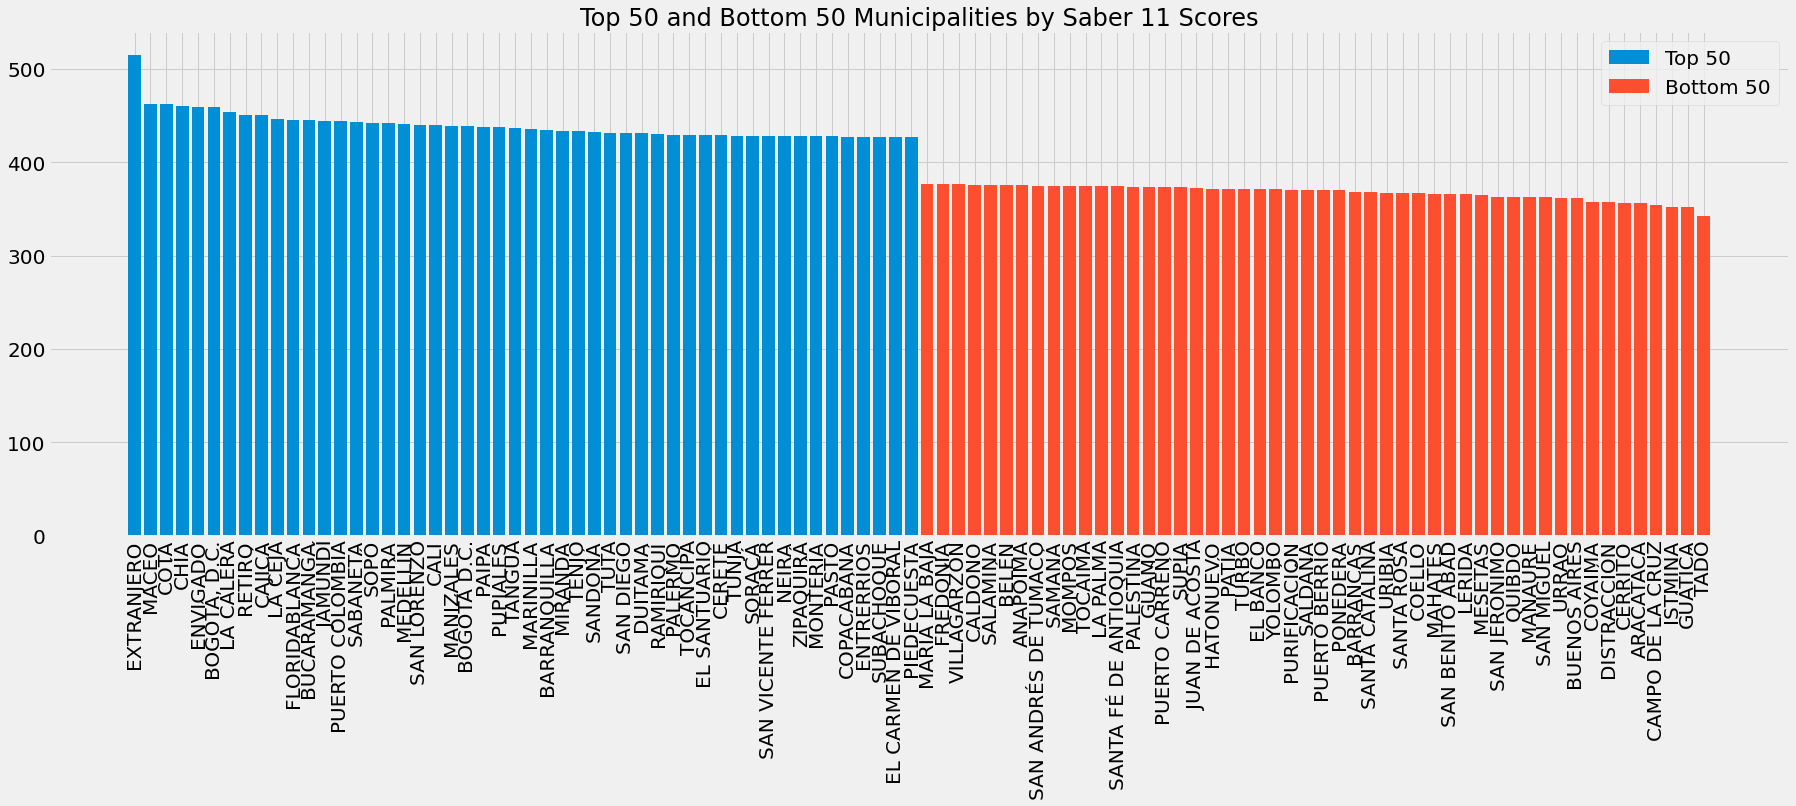

In [19]:
plt.figure(figsize=(25,10))

plt.bar(top_50_saber.index, top_50_saber, label = 'Top 50')
plt.bar(bot_50_saber.index, bot_50_saber, label = 'Bottom 50')
plt.xticks(rotation=90)
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)

plt.title('Top 50 and Bottom 50 Municipalities by Saber 11 Scores', fontsize=24)

In [20]:
top_50_saber_pro = saber_municipality_score['total_saber_pro_score']['mean'].sort_values(ascending=False).head(50)
bot_50_saber_pro = saber_municipality_score['total_saber_pro_score']['mean'].sort_values(ascending=False).tail(50)

Text(0.5, 1.0, 'Top 50 and Bottom 50 Municipalities by Saber Pro Scores')

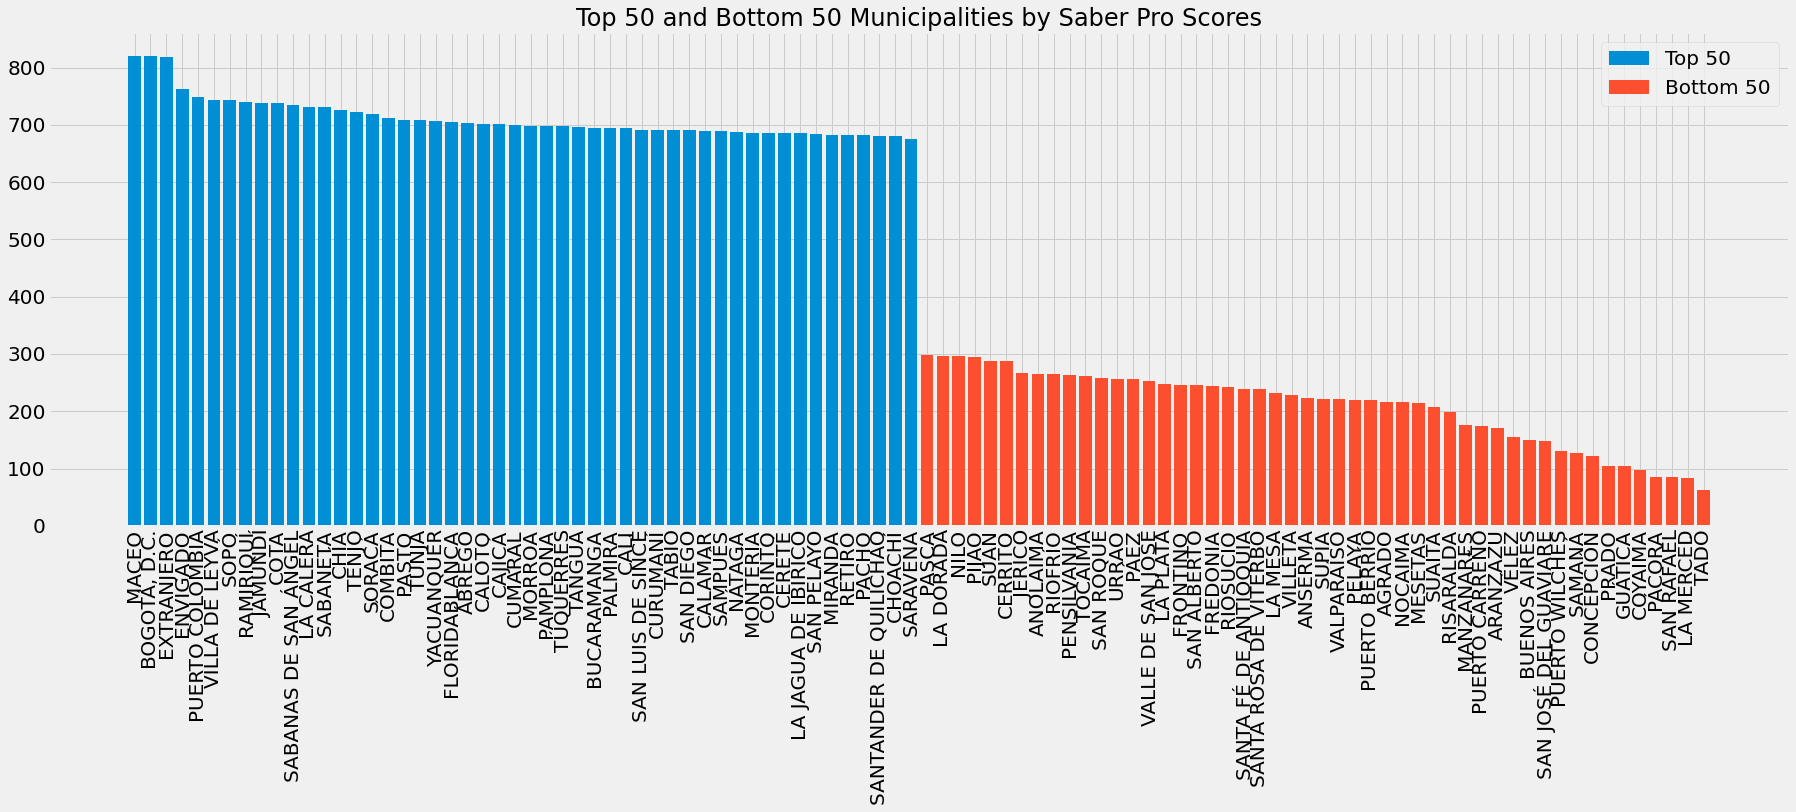

In [21]:
plt.figure(figsize=(25,10))

plt.bar(top_50_saber_pro.index, top_50_saber_pro, label = 'Top 50')
plt.bar(bot_50_saber_pro.index, bot_50_saber_pro, label = 'Bottom 50')
plt.xticks(rotation=90)
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)

plt.title('Top 50 and Bottom 50 Municipalities by Saber Pro Scores', fontsize=24)

From the two graphs, we see that there is a great mean score difference between the Top 50 and Bottom 50 Municipalities. There is an even greater difference in <code> Saber Pro </code>. We will explore these differences by first examining the factors that affect mean scores. 

# Scores by Social Factors

This section aims to visualize whether certain social factors have an effect to mean scores.

For the full analysis: check out the <code> Combined Data Visualization and Insights Notebook </code>

In [22]:
relevant_social_factors = ['your_course_teacher_ies', "your_course_external_support_ies", 'your_course_external_ies', 
                           'fami_housing_stratum', 'fami_internet', 'fami_computer', 'fami_automobile', 'fami_father_education', 'fami_mother_education',
                           'fami_father_occupation','fami_mother_occupation']

In [23]:
saber_top_50_municipalities = top_50_saber.index.to_list()
saber_bot_50_municipalities = bot_50_saber.index.to_list()
saber_pro_top_50_municipalities = top_50_saber_pro.index.to_list()
saber_pro_bot_50_municipalities = bot_50_saber_pro.index.to_list()

In [24]:
saber_pro_top_50 = saber.loc[saber['your_municipality_resides'].isin(saber_pro_top_50_municipalities)]
print("There are {} datapoints in the saber dataset for all top 50 municipalities".format(saber_pro_top_50.shape[0]))

saber_pro_bot_50 = saber.loc[saber['your_municipality_resides'].isin(saber_pro_bot_50_municipalities)]
print("There are {} datapoints in the saber dataset for all bot 50 municipalities".format(saber_pro_bot_50.shape[0]))

There are 54195 datapoints in the saber dataset for all top 50 municipalities
There are 2258 datapoints in the saber dataset for all bot 50 municipalities


## Characterizing Top 50 and Bottom Municipalities

### Access to test preparation

<Figure size 1440x720 with 0 Axes>

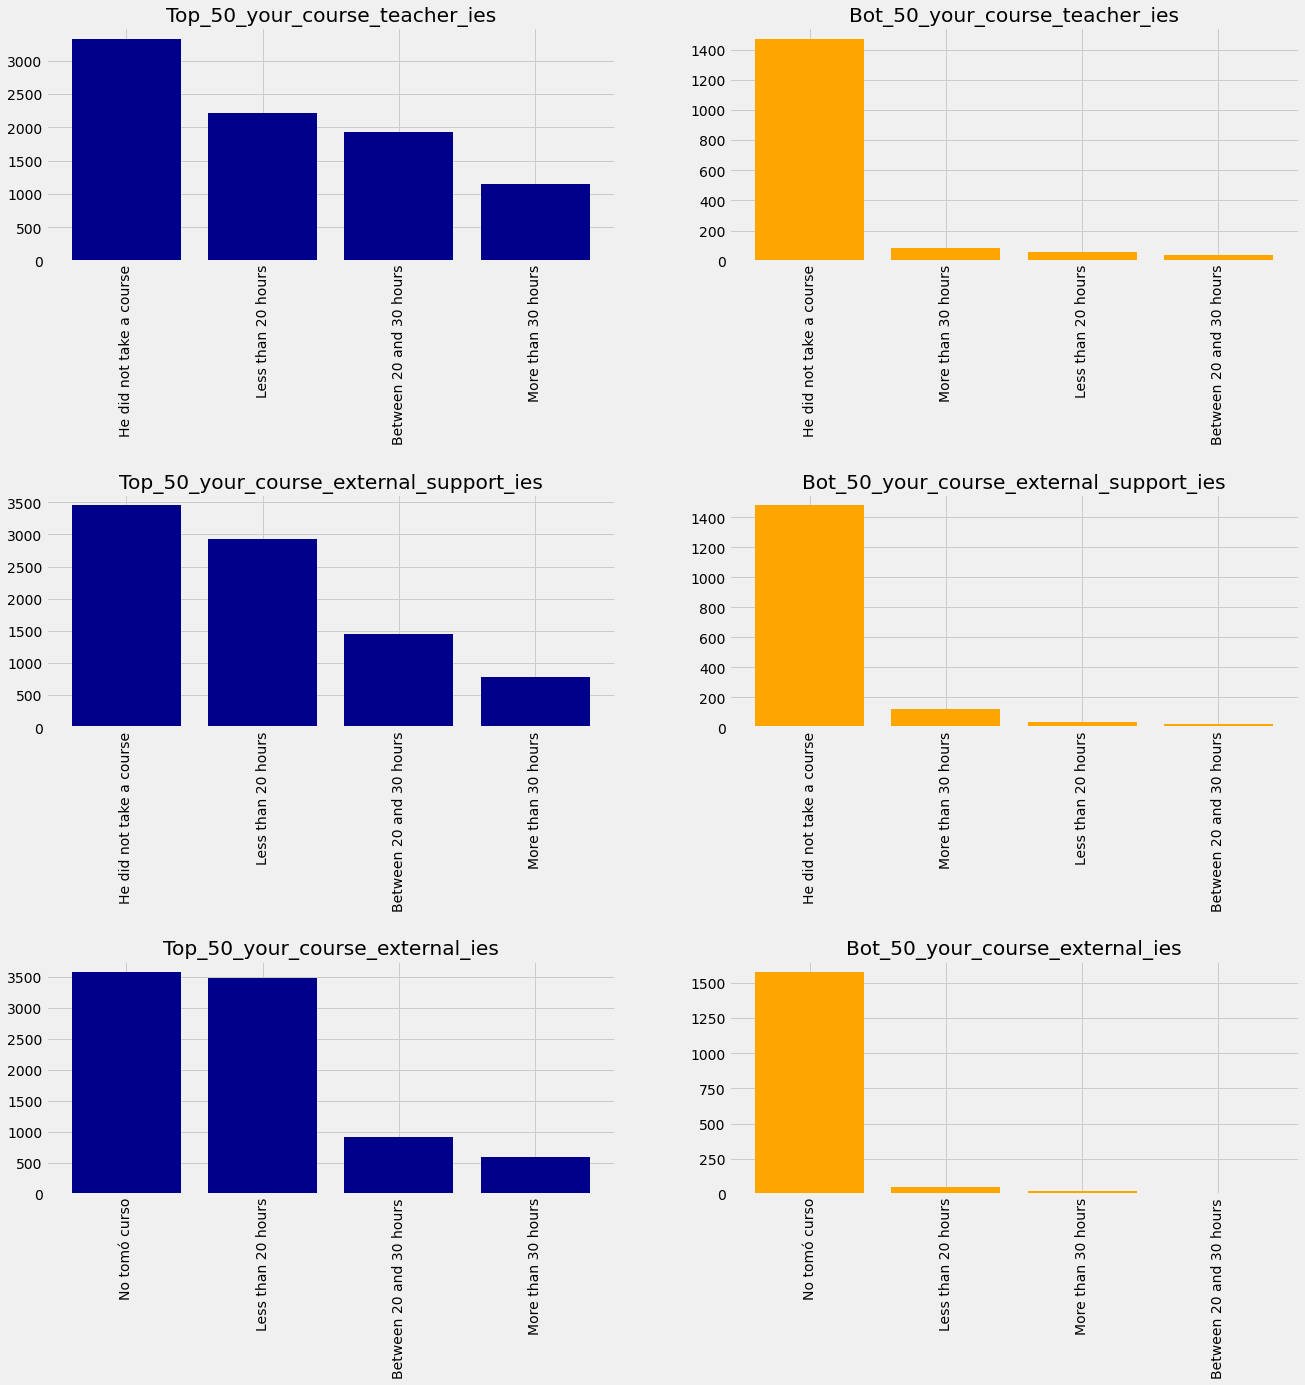

In [25]:
plt.figure(figsize=(20,10))

fig, axs = plt.subplots(3, 2, figsize=(20,20))
plt.subplots_adjust(hspace = 1.0)

top_your_course_teacher_ies = saber_pro_top_50.groupby(saber_pro_top_50['your_course_teacher_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_your_course_external_support_ies = saber_pro_top_50.groupby(saber_pro_top_50['your_course_external_support_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_your_course_external_ies = saber_pro_top_50.groupby(saber_pro_top_50['your_course_external_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,0].bar(top_your_course_teacher_ies.head(5).index, top_your_course_teacher_ies.head(5).values, color='darkblue')
axs[0,0].set_title("Top_50_your_course_teacher_ies")
axs[0,0].tick_params(axis='x', rotation=90)

axs[1,0].bar(top_your_course_external_support_ies.head(5).index, top_your_course_external_support_ies.head(5).values, color='darkblue')
axs[1,0].set_title("Top_50_your_course_external_support_ies")
axs[1,0].tick_params(axis='x', rotation=90)

axs[2,0].bar(top_your_course_external_ies.head(5).index, top_your_course_external_ies.head(5).values, color='darkblue')
axs[2,0].set_title("Top_50_your_course_external_ies")
axs[2,0].tick_params(axis='x', rotation=90)

bot_your_course_teacher_ies = saber_pro_bot_50.groupby(saber_pro_bot_50['your_course_teacher_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_your_course_external_support_ies = saber_pro_bot_50.groupby(saber_pro_bot_50['your_course_external_support_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_your_course_external_ies = saber_pro_bot_50.groupby(saber_pro_bot_50['your_course_external_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,1].bar(bot_your_course_teacher_ies.head(5).index, bot_your_course_teacher_ies.head(5).values, color='orange')
axs[0,1].set_title("Bot_50_your_course_teacher_ies")
axs[0,1].tick_params(axis='x', rotation=90)

axs[1,1].bar(bot_your_course_external_support_ies.head(5).index, bot_your_course_external_support_ies.head(5).values, color='orange')
axs[1,1].set_title("Bot_50_your_course_external_support_ies")
axs[1,1].tick_params(axis='x', rotation=90)

axs[2,1].bar(bot_your_course_external_ies.head(5).index, bot_your_course_external_ies.head(5).values, color='orange')
axs[2,1].set_title("Bot_50_your_course_external_ies")
axs[2,1].tick_params(axis='x', rotation=90)

We can see that when it comes to access to test preparation, top municipalities have more students getting test preparations while bottom municipalities have students who do not have access to preparation tests and it is affecting their mean scores. 

### Parents Education and Occupation

<Figure size 1440x1440 with 0 Axes>

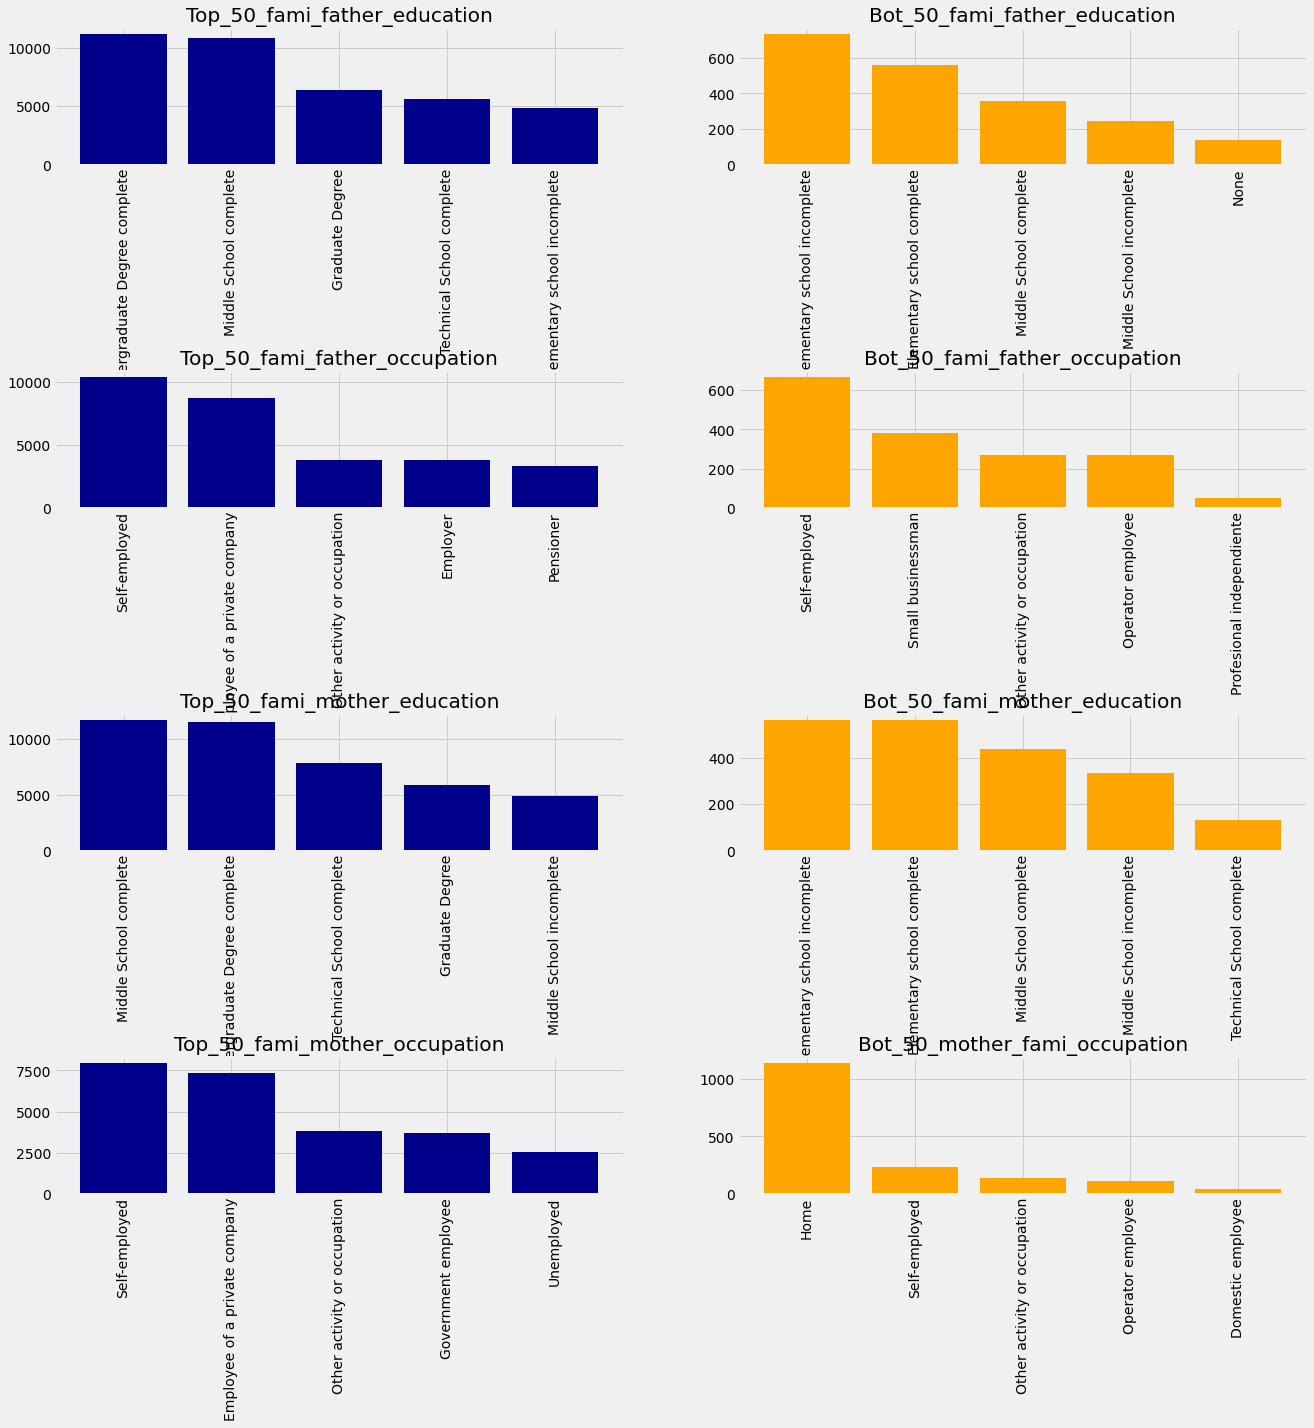

In [26]:
plt.figure(figsize=(20,20))

fig, axs = plt.subplots(4, 2, figsize=(20,20))
plt.subplots_adjust(hspace = 1.5)

top_fami_father_education = saber_pro_top_50.groupby(saber_pro_top_50['fami_father_education'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_fami_father_occupation = saber_pro_top_50.groupby(saber_pro_top_50['fami_father_occupation'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_fami_mother_education = saber_pro_top_50.groupby(saber_pro_top_50['fami_mother_education'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_fami_mother_occupation = saber_pro_top_50.groupby(saber_pro_top_50['fami_mother_occupation'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,0].bar(top_fami_father_education.head(5).index, top_fami_father_education.head(5).values, color='darkblue')
axs[0,0].set_title("Top_50_fami_father_education")
axs[0,0].tick_params(axis='x', rotation=90)

axs[1,0].bar(top_fami_father_occupation.head(5).index, top_fami_father_occupation.head(5).values, color='darkblue')
axs[1,0].set_title("Top_50_fami_father_occupation")
axs[1,0].tick_params(axis='x', rotation=90)

axs[2,0].bar(top_fami_mother_education.head(5).index, top_fami_mother_education.head(5).values, color='darkblue')
axs[2,0].set_title("Top_50_fami_mother_education")
axs[2,0].tick_params(axis='x', rotation=90)

axs[3,0].bar(top_fami_mother_occupation.head(5).index, top_fami_mother_occupation.head(5).values, color='darkblue')
axs[3,0].set_title("Top_50_fami_mother_occupation")
axs[3,0].tick_params(axis='x', rotation=90)

bot_fami_father_education = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_father_education'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_fami_father_occupation = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_father_occupation'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_mother_fami_education = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_mother_education'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_mother_fami_occupation = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_mother_occupation'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,1].bar(bot_fami_father_education.head(5).index, bot_fami_father_education.head(5).values, color='orange')
axs[0,1].set_title("Bot_50_fami_father_education")
axs[0,1].tick_params(axis='x', rotation=90)

axs[1,1].bar(bot_fami_father_occupation.head(5).index, bot_fami_father_occupation.head(5).values, color='orange')
axs[1,1].set_title("Bot_50_fami_father_occupation")
axs[1,1].tick_params(axis='x', rotation=90)

axs[2,1].bar(bot_mother_fami_education.head(5).index, bot_mother_fami_education.head(5).values, color='orange')
axs[2,1].set_title("Bot_50_fami_mother_education")
axs[2,1].tick_params(axis='x', rotation=90)

axs[3,1].bar(bot_mother_fami_occupation.head(5).index, bot_mother_fami_occupation.head(5).values, color='orange')
axs[3,1].set_title("Bot_50_mother_fami_occupation")
axs[3,1].tick_params(axis='x', rotation=90)

 **There is a stark divide shown between the Top and Bottom Municipalities when it comes to Saber Pro scores.** Majority of the bottom municipality students have parents who finished only up to elementary school while majority of Top municipality students have parents who finished Middle and even undergraduate degrees! Moreover, the lack of education of parents trickle down to their occupation. It can be seen that for top municipalities, both parents are working for the family whereas for the bottom munipalities, only the father is working and the mothers are stay at home. 
 
The same distribution holds for saber scores! 

### Access to resources

<Figure size 1440x720 with 0 Axes>

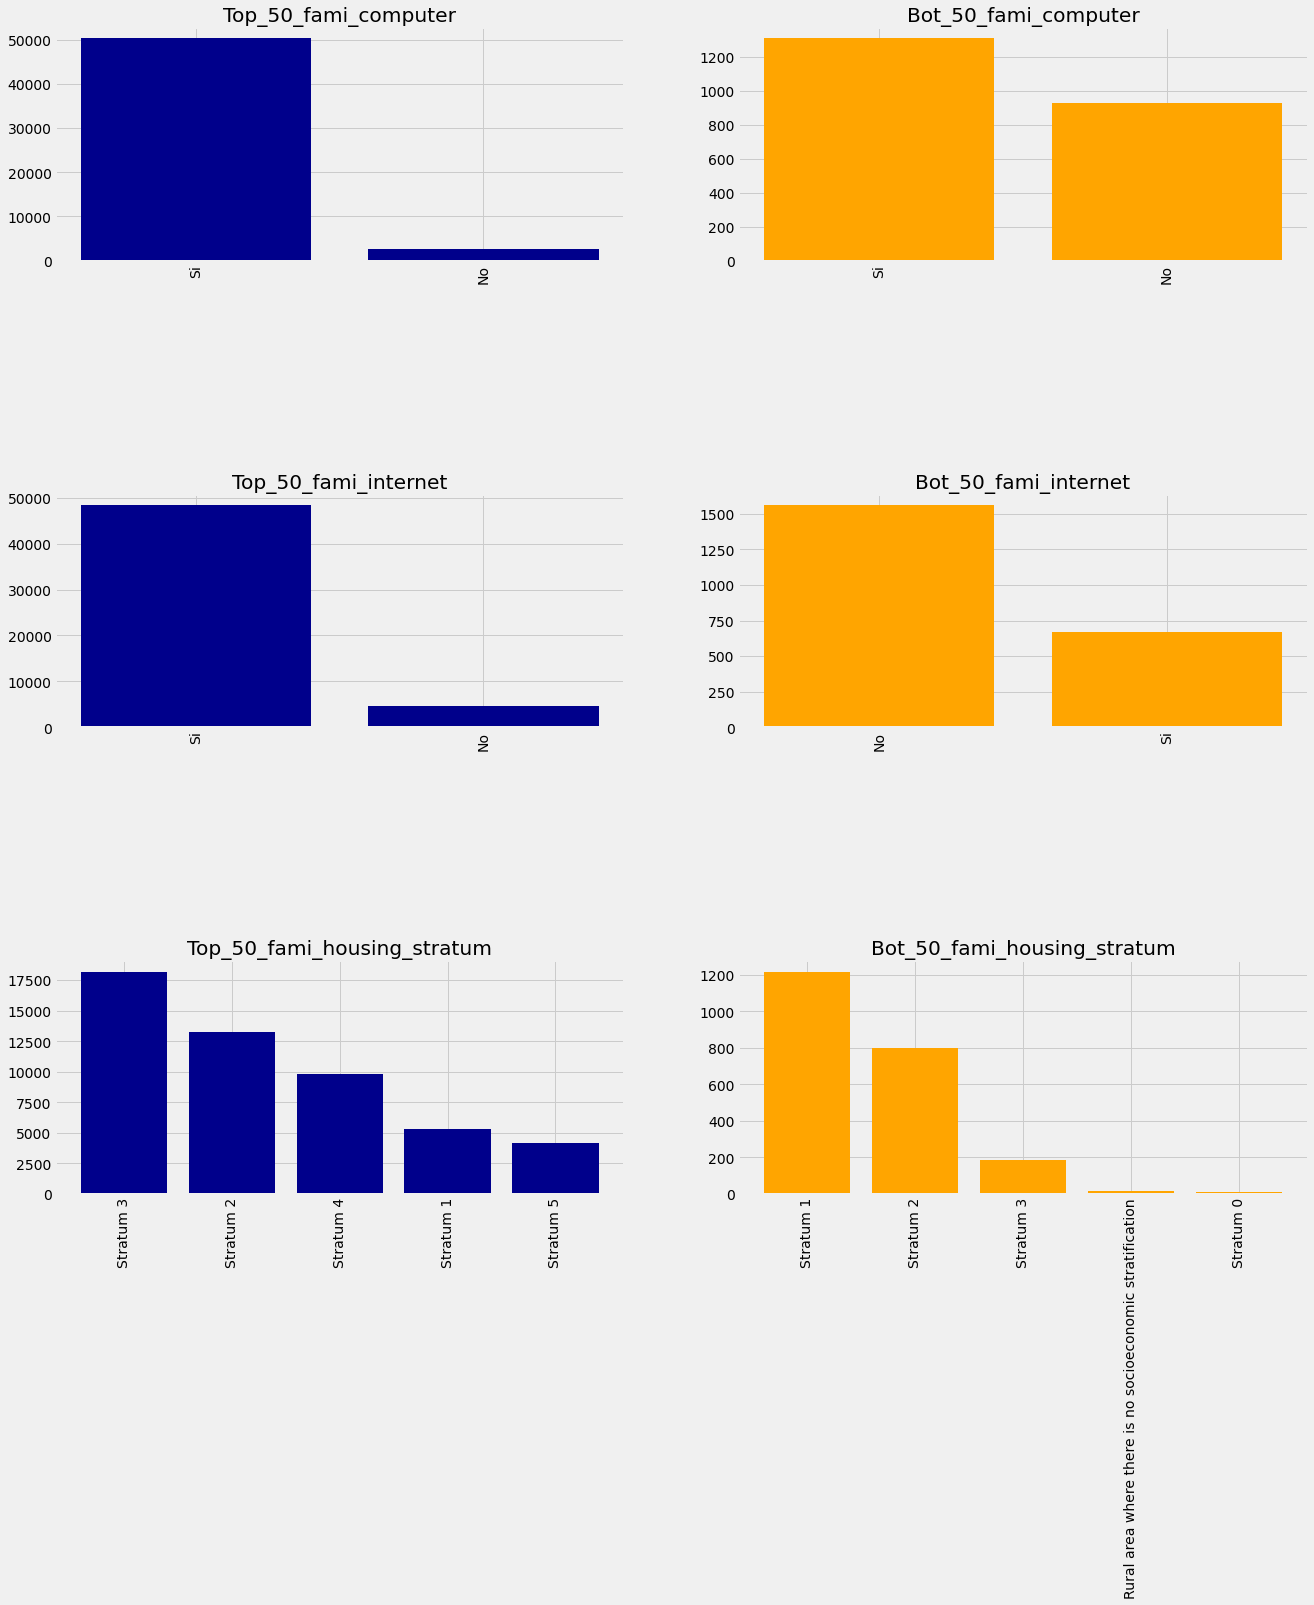

In [27]:
plt.figure(figsize=(20,10))

fig, axs = plt.subplots(3, 2, figsize=(20,20))
plt.subplots_adjust(hspace = 1.0)

top_fami_computer = saber_pro_top_50.groupby(saber_pro_top_50['fami_computer'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_fami_internet = saber_pro_top_50.groupby(saber_pro_top_50['fami_internet'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_fami_housing_stratum = saber_pro_top_50.groupby(saber_pro_top_50['fami_housing_stratum'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,0].bar(top_fami_computer.head(5).index, top_fami_computer.head(5).values, color='darkblue')
axs[0,0].set_title("Top_50_fami_computer")
axs[0,0].tick_params(axis='x', rotation=90)

axs[1,0].bar(top_fami_internet.head(5).index, top_fami_internet.head(5).values, color='darkblue')
axs[1,0].set_title("Top_50_fami_internet")
axs[1,0].tick_params(axis='x', rotation=90)

axs[2,0].bar(top_fami_housing_stratum.head(5).index, top_fami_housing_stratum.head(5).values, color='darkblue')
axs[2,0].set_title("Top_50_fami_housing_stratum")
axs[2,0].tick_params(axis='x', rotation=90)

bot_fami_computer = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_computer'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_fami_internet = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_internet'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_fami_housing_stratum = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_housing_stratum'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,1].bar(bot_fami_computer.head(5).index, bot_fami_computer.head(5).values, color='orange')
axs[0,1].set_title("Bot_50_fami_computer")
axs[0,1].tick_params(axis='x', rotation=90)

axs[1,1].bar(bot_fami_internet.head(5).index, bot_fami_internet.head(5).values, color='orange')
axs[1,1].set_title("Bot_50_fami_internet")
axs[1,1].tick_params(axis='x', rotation=90)

axs[2,1].bar(bot_fami_housing_stratum.head(5).index, bot_fami_housing_stratum.head(5).values, color='orange')
axs[2,1].set_title("Bot_50_fami_housing_stratum")
axs[2,1].tick_params(axis='x', rotation=90)

There is also a great divide when it comes to access to resources. Majority of the students in the bottom municipalities have computers but **no access to the internet**. This may cause a decrease in Saber pro scores. Furthermore, majority of bottom municipalities' families live on stratum 1 (the lowest) housing level whereas those in the top municipalities live in stratum 3 housing. 

### Subjects to work on: Muncipality level

#### Legend: Green = Lowest subject mark per municipality/department, Scores in Blue = Score lower than the mean of that subject

In [28]:
# Highlighting scores per municipality which fall below the mean for the municipalities per subject
def mean_score_check(x, color):
    return np.where(x < np.mean(x.to_numpy()), f"color: {color};", x)

In [29]:
saber_pro_bot_50.groupby('your_municipality_resides')[saber_pro_marks].mean().style.apply(mean_score_check, color='blue', axis=0)\
                                                                                   .highlight_min(color='lightgreen', axis=1)

,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro
your_municipality_resides,,,,,
AGRADO,42.550000,43.561111,40.305556,43.394444,45.974444
ANOLAIMA,52.700000,54.965000,50.350000,53.220000,54.442500
ANSERMA,46.009091,44.618182,42.298485,48.096970,44.838571
ARANZAZU,33.680645,34.780645,33.500000,33.080645,37.549333
BUENOS AIRES,28.852941,28.305882,33.976471,28.094118,32.703750
CERRITO,60.223529,55.652941,49.623529,54.447059,67.092941
CONCEPCIÓN,24.247059,24.170588,23.758824,25.452941,24.568235
COYAIMA,19.775000,18.460000,18.110000,19.740000,22.002500
FREDONIA,48.350000,49.125000,50.035714,47.639286,49.451429


The scores highlighted in green are the lowest scores per municipality while those colored blue are the scores which fall below the mean!

Therefore, the following municipalities:
- ARANZAZU
- BUENOS AIRES
- CONCEPCION
- COYAIMA
- GUATICA
- LA MERCED
- MANZANARES
- PRADO
- PUERTO CARREÑO	
- PUERTO WILCHES	
- PÁCORA
- RISARALDA
- SAMANÁ
- SAN JOSÉ DEL GUAVIARE	
- SAN RAFAEL	
- TADÓ
- VÉLEZ

are all municipalities who consistently score below the mean of the bottom municipalities! There are the bottom of the bottom municipalities and are recommended to be given special attention!

It is also needed to note that the lowest subject per municipality is the social science subject! It is recommended to work on this subject!


In [30]:
saber_marks = ['score_language_saber_11',
 'score_mathematics_saber_11',
 'score_biology_saber_11',
 'score_chemistry_saber_11',
 'score_physics_saber_11',
 'score_social_science_saber_11',
 'score_philosophy_saber_11',
 'score_english_saber_11']

In [31]:
# Showing lowest marks per bottom 50 municipality 
saber_pro_bot_50.groupby('your_municipality_resides')[saber_marks].mean().style.apply(mean_score_check, color='blue', axis=0)\
                                                                                   .highlight_min(color='lightgreen', axis=1)\
    

,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11
your_municipality_resides,,,,,,,,
AGRADO,43.888889,43.444444,45.833333,45.222222,42.277778,41.555556,39.611111,46.111111
ANOLAIMA,48.300000,50.050000,45.850000,49.350000,44.950000,49.250000,42.400000,45.000000
ANSERMA,45.651515,43.969697,44.590909,44.333333,42.727273,44.424242,39.303030,40.893939
ARANZAZU,46.903226,42.935484,44.677419,44.903226,43.838710,44.935484,41.032258,41.580645
BUENOS AIRES,43.411765,43.176471,42.588235,44.647059,40.058824,40.647059,35.705882,37.058824
CERRITO,45.000000,41.882353,44.705882,46.352941,43.294118,41.294118,38.647059,42.764706
CONCEPCIÓN,45.705882,47.294118,42.529412,44.529412,45.176471,43.823529,42.705882,42.176471
COYAIMA,43.000000,38.150000,38.600000,41.650000,41.700000,38.650000,34.550000,37.700000
FREDONIA,45.857143,44.678571,42.392857,42.892857,40.571429,43.750000,38.392857,43.071429


Majority of the lowest scores are from the philosophy and english section! These are both related to literacy and it is then recommended to focus on these subjects! 

### Subjects to work on: Department level

In [32]:
# Showing lowest marks department
saber.groupby('your_dept_resides')[saber_marks].mean().style.apply(mean_score_check, color='blue', axis=0)\
                                                                                   .highlight_min(color='lightgreen', axis=1)

,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11
your_dept_resides,,,,,,,,
AMAZONAS,47.687500,44.281250,45.187500,45.593750,44.906250,44.968750,42.531250,41.281250
ANTIOQUIA,51.970659,52.128493,49.445644,49.514712,48.272604,50.037583,45.031237,52.709800
ARAUCA,47.164062,45.562500,45.863281,45.941406,44.328125,45.515625,40.820312,44.234375
ATLANTICO,50.889175,51.114182,48.909454,49.694730,49.149029,48.751214,44.580905,52.257855
BOGOTA,53.219333,54.505108,51.126950,52.156149,50.572982,51.582033,46.914354,56.926112
BOLIVAR,50.188814,49.543773,48.319612,49.208501,47.931544,48.358986,44.094705,48.479642
BOYACA,50.771358,52.238558,49.608886,50.281083,48.597063,49.943745,44.757056,48.817124
CALDAS,51.037684,51.158548,49.297335,50.097656,48.431526,49.367647,44.875689,50.080653
CAQUETA,48.094925,46.906015,46.679511,47.180451,45.802632,47.192669,41.955827,44.767857


Similar to municipalities, philosophy is the weakest subject even in the department level! It is suggested for this subject to be improved!

In [33]:
# Showing lowest marks department
saber.groupby('your_dept_resides')[saber_pro_marks].mean().style.apply(mean_score_check, color='blue', axis=0)\
                                                                                   .highlight_min(color='lightgreen', axis=1)

,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro
your_dept_resides,,,,,
AMAZONAS,78.784375,83.631250,81.812500,80.081250,88.706250
ANTIOQUIA,121.802279,125.400457,118.108258,127.650767,119.116040
ARAUCA,127.799219,126.125391,119.075781,122.041797,127.533374
ATLANTICO,122.431084,125.557234,117.086097,131.519287,121.539778
BOGOTA,131.324741,132.903255,126.540958,139.859396,128.193800
BOLIVAR,121.863460,126.797032,117.479791,126.958046,123.563663
BOYACA,127.427860,124.366629,118.804500,121.181407,121.200802
CALDAS,111.790740,112.670772,107.151379,111.941108,108.175969
CAQUETA,114.035244,114.050188,109.309211,112.256767,117.526974


Similar to municipality level again, social sciences holds the lowest score per department! It is recommended that this subject be improved.

# Scores by High School Degree

This section illustrates the distribution of students by their high school degree and whether these degrees affect scores. 

In [34]:
saber['your_high_school_degree'].value_counts()

Academic Bachelor                       144212
Technical Bachelor                       59264
Pedagogical or normalist high school      4288
Superior Normalist                        2370
Name: your_high_school_degree, dtype: int64

<AxesSubplot:xlabel='your_high_school_degree'>

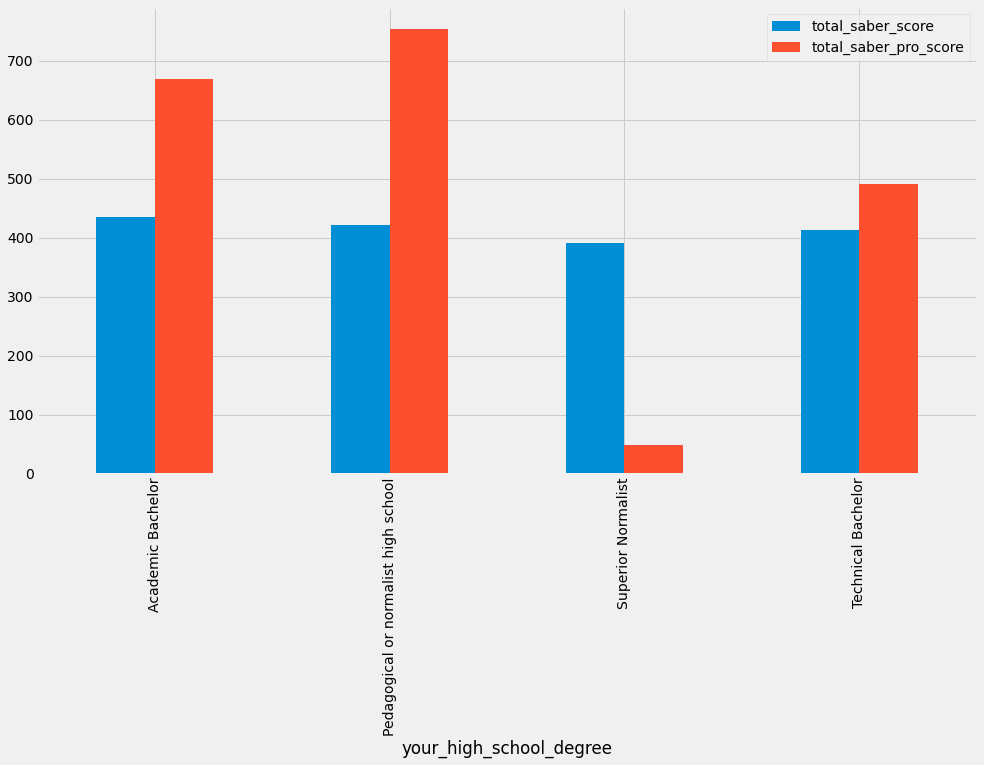

In [35]:
saber.groupby('your_high_school_degree')[total_marks].mean().plot.bar(figsize=(15, 8))

It appears students who had a high school degree of superior normalist and technical bachelor have substantially lower saber pro scores.

### Summary Table for High School Degrees

In [36]:
saber.groupby('your_high_school_degree').agg(
{
'your_course_teacher_ies': lambda x: x.value_counts().index[0],
'your_course_external_ies': lambda x: x.value_counts().index[0],
'your_course_external_support_ies': lambda x: x.value_counts().index[0],
'fami_housing_stratum': lambda x: x.value_counts().index[0],
'fami_internet': lambda x: x.value_counts().index[0],
'fami_computer': lambda x: x.value_counts().index[0],
'fami_automobile': lambda x: x.value_counts().index[0],
'fami_father_education': lambda x: x.value_counts().index[0],
'fami_mother_education': lambda x: x.value_counts().index[0],
'fami_father_occupation': lambda x: x.value_counts().index[0],
'fami_mother_occupation': lambda x: x.value_counts().index[0], 
'fami_housing_stratum': lambda x: x.value_counts().index[0], 
'total_saber_pro_score': 'mean',
'total_saber_score': 'mean'
}).reset_index()

,your_high_school_degree,your_course_teacher_ies,your_course_external_ies,your_course_external_support_ies,fami_housing_stratum,fami_internet,fami_computer,fami_automobile,fami_father_education,fami_mother_education,fami_father_occupation,fami_mother_occupation,total_saber_pro_score,total_saber_score
0,Academic Bachelor,He did not take a course,No tomó curso,He did not take a course,Stratum 3,Si,Si,No,Middle School complete,Middle School complete,Self-employed,Self-employed,669.461931,434.743544
1,Pedagogical or normalist high school,Less than 20 hours,Less than 20 hours,Less than 20 hours,Stratum 2,Si,Si,No,Middle School complete,Middle School complete,Self-employed,Self-employed,752.938899,421.514459
2,Superior Normalist,He did not take a course,No tomó curso,He did not take a course,Stratum 1,No,Si,No,Elementary school incomplete,Middle School complete,Self-employed,Home,47.801561,390.964979
3,Technical Bachelor,He did not take a course,No tomó curso,He did not take a course,Stratum 2,Si,Si,No,Middle School complete,Middle School complete,Self-employed,Home,491.338676,412.565841


From simply summarizing tabularly, we see students with high school degrees from Superior Normalist and Technical Bachelor have only one working parent, live on lower stratum (1 and 2) housing, and did not have access to preparation tests similar to the characteristics of those in the bottom municipalities!